# Data Synthesis: MNIST to Sequence Recognition

Let's synthesize a dataset from MINST since digits are usually not standalone in the real world.

- Input: Images of digits
- Output: An image of a sequence of digits

In [7]:
import os
import random
import shutil

import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

In [8]:
ds, info = tfds.load('mnist', split='train', with_info=True)
# fig = tfds.show_examples(ds, info)

In [9]:
df = tfds.as_dataframe(ds, ds_info=info)

2024-04-23 09:58:06.020599: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [10]:
df.sample(5)

,image,label
11846,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",0
49443,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",4
13892,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",2
58117,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",9
7485,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",0


<Axes: xlabel='label'>

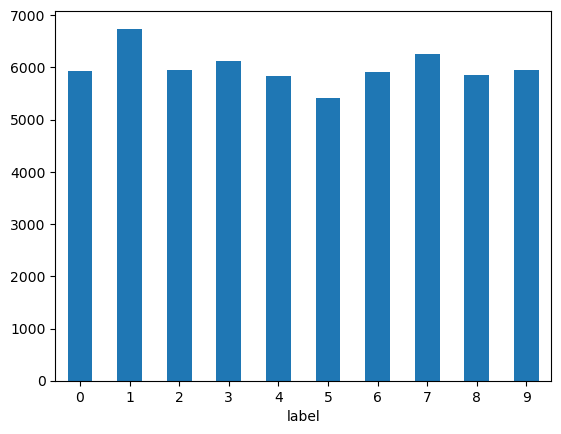

In [11]:
df['label'].value_counts().sort_index().plot.bar(rot=0)

In [12]:
NUM_EXAMPLES = 5000
NUM_CHARS = 4

char_sequences = [str(random.randint(int('1' + str('0' * (NUM_CHARS - 1))), int('9' * NUM_CHARS))) for _ in range(NUM_EXAMPLES)]
char_sequences[:10]

['3499',
 '5262',
 '3451',
 '8951',
 '8594',
 '6557',
 '6879',
 '9544',
 '9099',
 '6127']

In [13]:
sequence_images = np.zeros((NUM_EXAMPLES, 28, 28 * NUM_CHARS, 1), dtype=np.uint8)

for i, seq in enumerate(char_sequences):
    for j, char in enumerate(seq):
        sample = df[df['label'] == int(char)].sample(n=1).iloc[0]
        sequence_images[i, :, j * 28:(j + 1) * 28] = sample['image']

In [14]:
print(f'size of sequence_images: {sequence_images.nbytes / 1024 / 1024:.2f} MB')

size of sequence_images: 14.95 MB


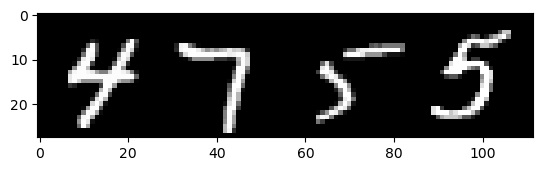

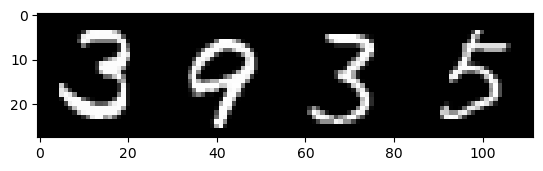

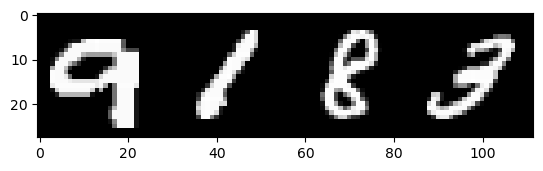

In [15]:
# show a sample of 3 generated sequences
for i in range(3):
    plt.imshow(sequence_images[random.randint(0, NUM_EXAMPLES)], cmap='gray')
    plt.show()

### Save the data

In [16]:

os.makedirs('generated/mnist-seq', exist_ok=True)

In [17]:
# save generated sequences
for i, seq in enumerate(char_sequences):
    img = Image.fromarray(sequence_images[i].reshape(28, 28 * NUM_CHARS))
    img.save(f'generated/mnist-seq/{i+1:0{int(len(str(NUM_EXAMPLES)))}}_{seq}.png')

# compress the dataset folder
shutil.make_archive('generated/mnist-seq', 'zip', 'generated/mnist-seq')

'/home/hgoz/learn/data-synthesis/generated/mnist-seq.zip'